In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

In [2]:
df = pd.read_csv("C:/workspace/data/seoul_PM/df_PM_pre.csv")

In [3]:
df

,날짜,미세먼지(PM10),초미세먼지(PM2.5),next_PM10,next_PM2.5,next_mask_need,기온(°C),강수량(mm),습도(%),증기압(hPa),...,풍속(16방위)_140,풍속(16방위)_160,풍속(16방위)_180,풍속(16방위)_200,풍속(16방위)_230,풍속(16방위)_250,풍속(16방위)_270,풍속(16방위)_290,풍속(16방위)_320,풍속(16방위)_340
0,2008-01-01,36.834558,13.160000,35.655399,16.006667,0,-6.337500,0.0,47.541667,1.700000,...,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,1.075000,2.420833,0.079167,0.191667
1,2008-01-02,35.655399,16.006667,53.705927,25.015480,0,-3.720833,0.0,49.708333,2.175000,...,0.0,0.000000,0.0000,0.050000,0.000000,0.700000,0.441667,0.783333,0.233333,0.000000
2,2008-01-03,53.705927,25.015480,78.231280,37.075943,1,0.866667,0.0,51.500000,3.250000,...,0.0,0.000000,0.0000,0.000000,0.000000,0.254167,0.908333,0.229167,0.000000,0.104167
3,2008-01-04,78.231280,37.075943,64.480598,28.653605,0,-0.379167,0.0,55.583333,3.200000,...,0.0,0.000000,0.0000,0.145833,0.000000,0.100000,0.720833,0.708333,0.079167,0.033333
4,2008-01-05,64.480598,28.653605,78.442576,40.808084,1,1.504167,0.0,60.500000,4.000000,...,0.0,0.000000,0.0000,0.000000,0.062500,0.212500,0.437500,0.437500,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5452,2022-12-26,46.834038,34.917054,49.191594,36.051107,1,-3.979167,0.0,68.000000,3.054167,...,0.0,0.000000,0.0000,0.058333,0.025000,0.250000,0.150000,0.108333,0.116667,0.079167
5453,2022-12-27,49.191594,36.051107,34.570833,21.232756,0,-2.641667,0.0,69.208333,3.441667,...,0.0,0.000000,0.0000,0.000000,0.054167,0.037500,0.041667,0.562500,0.025000,0.041667
5454,2022-12-28,34.570833,21.232756,30.307906,18.484193,0,-2.916667,0.1,58.916667,2.916667,...,0.0,0.000000,0.0000,0.000000,0.104167,0.000000,1.012500,0.766667,0.433333,0.000000
5455,2022-12-29,30.307906,18.484193,38.443462,27.576923,0,-3.295833,0.0,54.375000,2.600000,...,0.0,0.041667,0.0000,0.087500,0.000000,0.379167,0.275000,0.475000,0.058333,0.000000


In [4]:
df.columns

Index(['날짜', '미세먼지(PM10)', '초미세먼지(PM2.5)', 'next_PM10', 'next_PM2.5',
       'next_mask_need', '기온(°C)', '강수량(mm)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)',
       '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '적설(cm)', '전운량(10분위)',
       '중하층운량(10분위)', '최저운고(100m )', '시정(10m)', '지면온도(°C)', '5cm 지중온도(°C)',
       '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)', '풍속(16방위)_0',
       '풍속(16방위)_20', '풍속(16방위)_50', '풍속(16방위)_70', '풍속(16방위)_90',
       '풍속(16방위)_110', '풍속(16방위)_140', '풍속(16방위)_160', '풍속(16방위)_180',
       '풍속(16방위)_200', '풍속(16방위)_230', '풍속(16방위)_250', '풍속(16방위)_270',
       '풍속(16방위)_290', '풍속(16방위)_320', '풍속(16방위)_340'],
      dtype='object')

In [5]:
col_X1 = ['미세먼지(PM10)', '초미세먼지(PM2.5)', '기온(°C)', '강수량(mm)', '습도(%)', '적설(cm)']
col_X2 = list(df.columns[-16:])
col_X2

['풍속(16방위)_0',
 '풍속(16방위)_20',
 '풍속(16방위)_50',
 '풍속(16방위)_70',
 '풍속(16방위)_90',
 '풍속(16방위)_110',
 '풍속(16방위)_140',
 '풍속(16방위)_160',
 '풍속(16방위)_180',
 '풍속(16방위)_200',
 '풍속(16방위)_230',
 '풍속(16방위)_250',
 '풍속(16방위)_270',
 '풍속(16방위)_290',
 '풍속(16방위)_320',
 '풍속(16방위)_340']

In [6]:
col_X = col_X1 + col_X2
X = df[col_X]
y = df['next_mask_need']

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='next_mask_need', ylabel='count'>

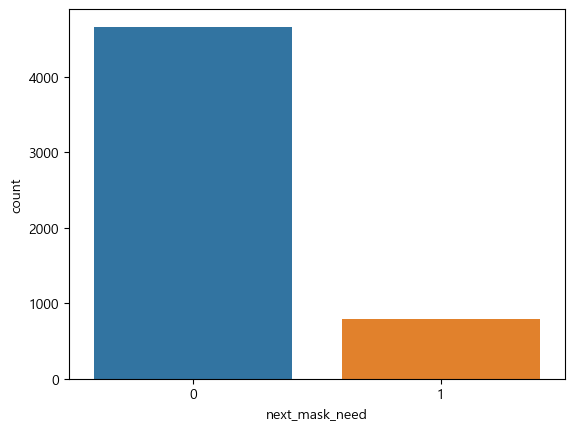

In [7]:
sns.countplot('next_mask_need', data=df)

In [8]:
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=2).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=col_X)
y_samp = pd.DataFrame(data=y_sample, columns=['next_mask_need'])
df_samp = pd.concat([X_samp, y_samp], axis=1)
df_samp['next_mask_need'].value_counts()

0    794
1    794
Name: next_mask_need, dtype: int64

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='next_mask_need', ylabel='count'>

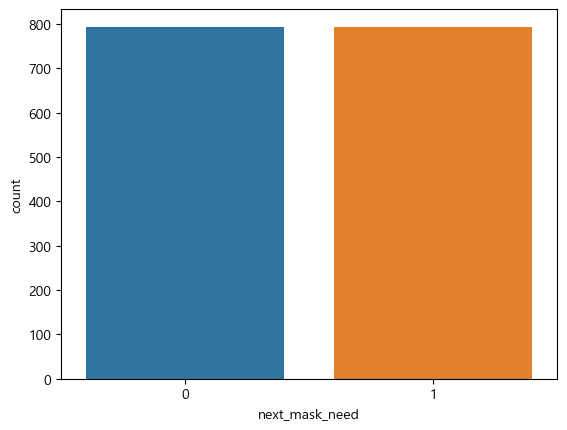

In [9]:
sns.countplot('next_mask_need', data=df_samp)

In [11]:
X = X_samp[col_X]
y = y_samp['next_mask_need']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [15]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, random_state=2)
model.fit(X_train, y_train)
print("학습용 :",model.score(X_train, y_train))
print("검증용 :",model.score(X_test, y_test))

학습용 : 0.8586858685868587
검증용 : 0.7651991614255765


In [16]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[165,  63],
       [ 49, 200]], dtype=int64)

In [17]:
df_cm = pd.DataFrame(cm, index=[0, 1], columns=[0, 1])
df_cm

,0,1
0,165,63
1,49,200


<AxesSubplot:>

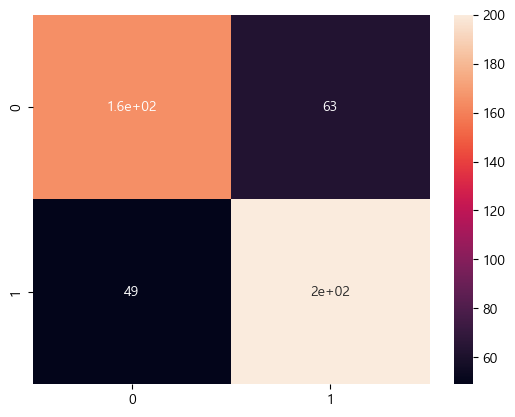

In [18]:
sns.heatmap(df_cm, annot=True)

In [20]:
scores = []
for i in range(1, 25):
    model = DecisionTreeClassifier(max_depth=i, random_state=2)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(max(scores))
print(np.argmax(scores))

0.779874213836478
2


In [21]:
model = DecisionTreeClassifier(max_depth=2, random_state=2)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=2)

In [23]:
PM_10 = 214
PM_25 = 48
temperatures = [14, 17, 19, 20, 20, 19, 17, 15,
                14, 14, 13, 13, 13, 13, 12, 12,
                12, 12, 11, 12, 13, 14, 15, 16]
rains = [0, 0, 0, 0, 0, 0 ,0, 0,
         0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]
humidities = [24, 20, 15, 15, 15, 20, 20, 30,
              35, 35, 35, 40, 45, 45, 50, 50,
              60, 60, 60, 60, 55, 50, 45, 45]
snows = [0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]
winds = [0, 0, 0, 0, 0, 0, 6.9, 0,
         16, 0, 17, 0, 2, 0, 0, 0]

In [26]:
temp = sum(temperatures) / len(temperatures)
rain = sum(rains)
humid = sum(humidities) / len(humidities)
snow = sum(snows)
wind = []
for w in winds:
    wind.append(w/24)

In [30]:
pre = [PM_10, PM_25, temp, rain, humid, snow] + wind
model.predict([pre])

c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)